# Food Delivery

## Team 5

### Tara Dehdari, Nishok Narayanan, Muris Saab

## Imports

In [21]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Importing Data

In [2]:
food = pd.read_csv("food_order.csv")

food.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## Exploratory Data Analysis / Preprocessing

In [3]:
# defining new columns for better readability
new_headers = ['Order ID', 'Customer ID', 'Restaurant Name', 'Cousine Type', 'Cost of the Order', 'Day of the Week', 'Rating', 'Food Preparation Time', 'Delivery Time']

# assign to data frame
food.columns = new_headers

# drop columns that aren't needed
food = food.drop(['Order ID', 'Customer ID'], axis = 1)

shape = food.shape
 
display(food.head())
display(food.info())
print(shape)

,Restaurant Name,Cousine Type,Cost of the Order,Day of the Week,Rating,Food Preparation Time,Delivery Time
0,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,Dirty Bird to Go,American,11.59,Weekday,4,25,24


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant Name        1898 non-null   object 
 1   Cousine Type           1898 non-null   object 
 2   Cost of the Order      1898 non-null   float64
 3   Day of the Week        1898 non-null   object 
 4   Rating                 1898 non-null   object 
 5   Food Preparation Time  1898 non-null   int64  
 6   Delivery Time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 103.9+ KB


None

(1898, 7)


**First we defined new column headers for improved readability of the dataset. These headers include 'Order ID,' 'Customer ID,' 'Restaurant Name,' 'Cuisine Type,' 'Cost of the Order,' 'Day of the Week,' 'Rating,' 'Food Preparation Time,' and 'Delivery Time.' We then assign the new headers to our DataFrame 'food', and we also drop the Order ID and Customer ID columns as they are not needed for the analysis. We then print out the head (which confirms the change of the column names as well as the dropped columns), information (which shows the data type of each column), and the shape of the dataset (which shows the dataset contains 7 columns and 1898 rows.)**

### Missing Values

In [4]:
food.isna().sum()

Restaurant Name          0
Cousine Type             0
Cost of the Order        0
Day of the Week          0
Rating                   0
Food Preparation Time    0
Delivery Time            0
dtype: int64

In [5]:
not_given_rate = (food['Rating'] == 'Not given').sum()
print(f'Total "Not given" ratings: {not_given_rate}')

Total "Not given" ratings: 736


In [6]:
# convert "Not Given" with 'NaN'
food['Rating'] = food['Rating'].replace('Not given', np.nan)

# convert rating to numeric type
food['Rating'] = pd.to_numeric(food['Rating'])

**Upon initial analysis the dataset showed know missing values, but the ratings had a option of "Not given". The "Not given" was changed to 'NaN' and then the rating column was converted to a nuermical data type for easier future analysis.**

### Analysis of Categorical Variables

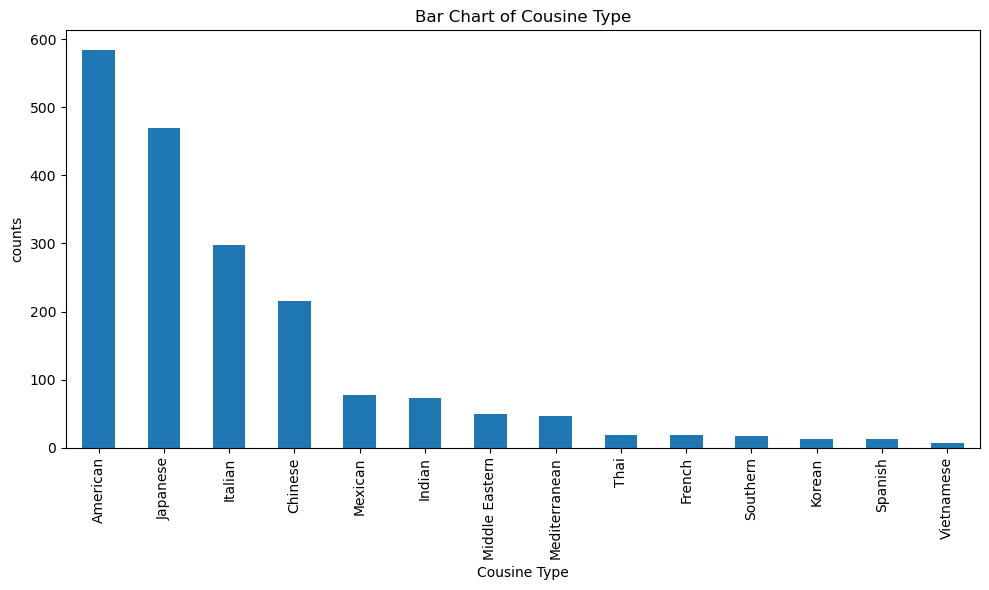

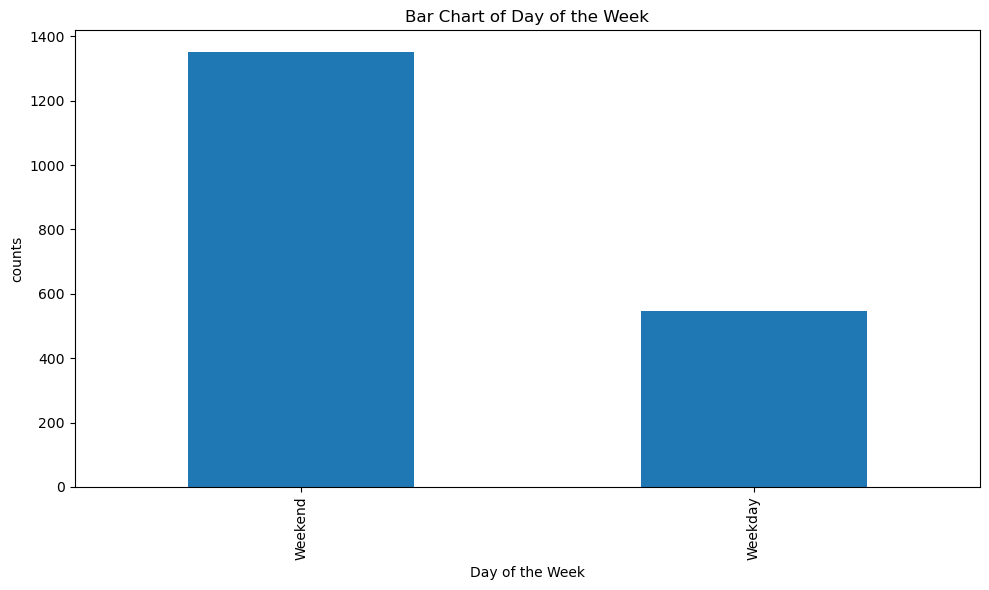

In [7]:
col_bar = ['Cousine Type', 'Day of the Week']

for col in col_bar:
    plt.figure(figsize= (10,6))
    food[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('counts')
    plt.tight_layout()

**A Bar chart was created for Cousine Type and Day of the Week. For Cousine Type we can see what food is most bought from the delivery site, which is American food. Next is Japanese than Italian Food. For the bar chart showing Day of the Week we can see that most people buy food during the weekend.**

In [8]:
# unique restaurant names
unique_names = food['Restaurant Name'].nunique()

# value counts
value_name = food['Restaurant Name'].value_counts()

# total number of restaurant entries
count = food['Restaurant Name'].count()

print("Unique Restaurant Names:\n")
print(unique_names)

print("Number of Each Restaurant:\n")
print(value_name)

print("\nTotal Number of Restaurant Entries:", count)

Unique Restaurant Names:

178
Number of Each Restaurant:

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: Restaurant Name, Length: 178, dtype: int64

Total Number of Restaurant Entries: 1898


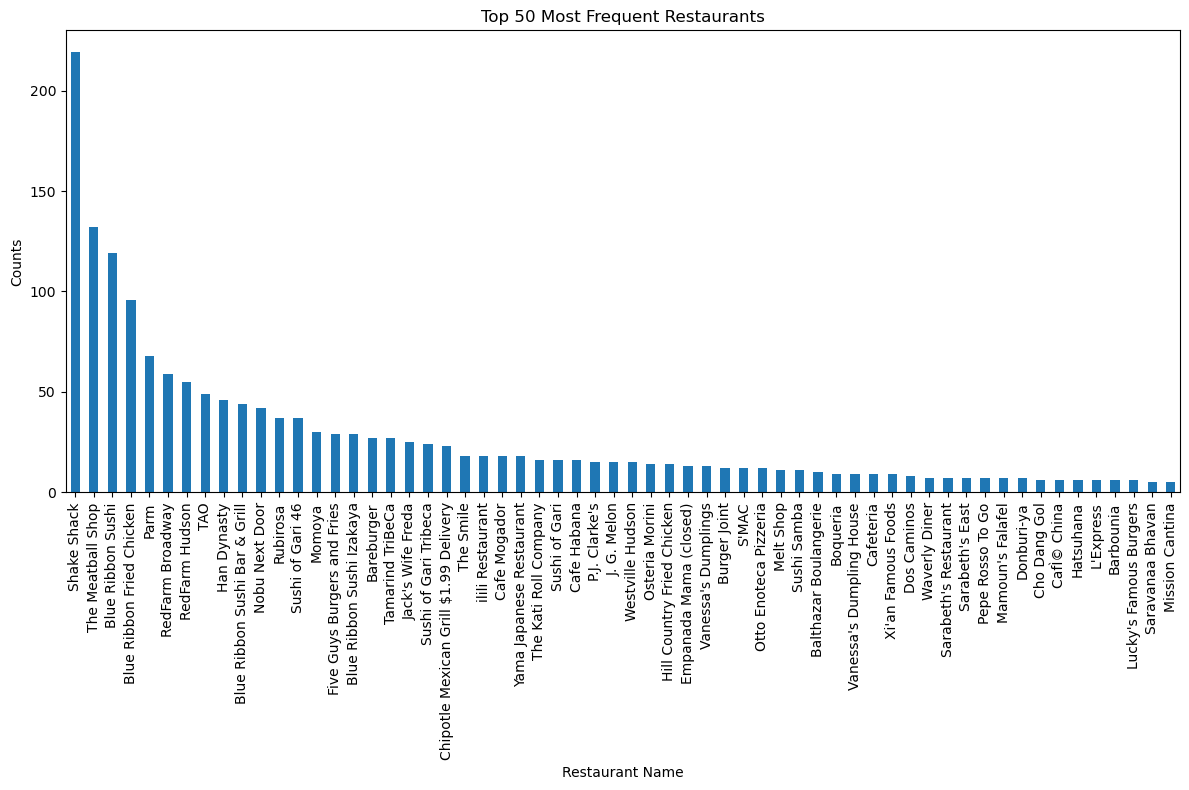

In [9]:
# top 50 restaurants 
top_50_restaurants = food['Restaurant Name'].value_counts().head(60)

# bar chart
plt.figure(figsize=(12,8))
top_50_restaurants.plot(kind = 'bar')
plt.title('Top 50 Most Frequent Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

**Some analysis into the Restaraunt Names was conducted in this code snippet. There are 178 unique different Restaraunt Names out of 1898. From the printed out list and the bar chart we can see that Shake Shack, The Meatball shop, and Blue Ribbon Sushi are the top most named restaraunts in the dataset.**

### Analysis of Numerical Variables

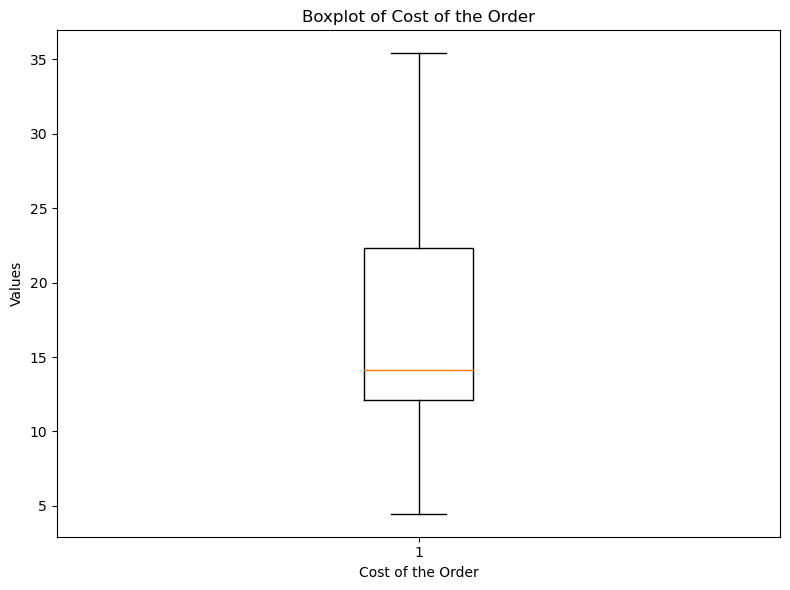

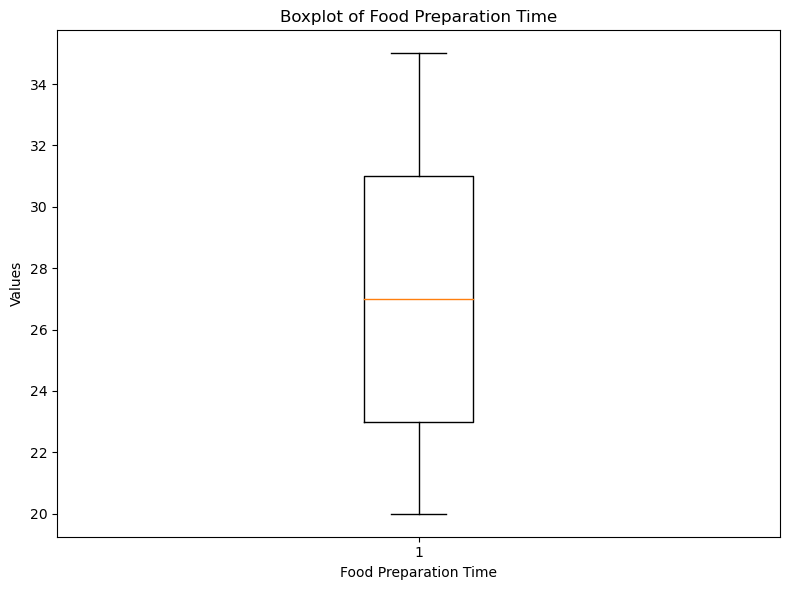

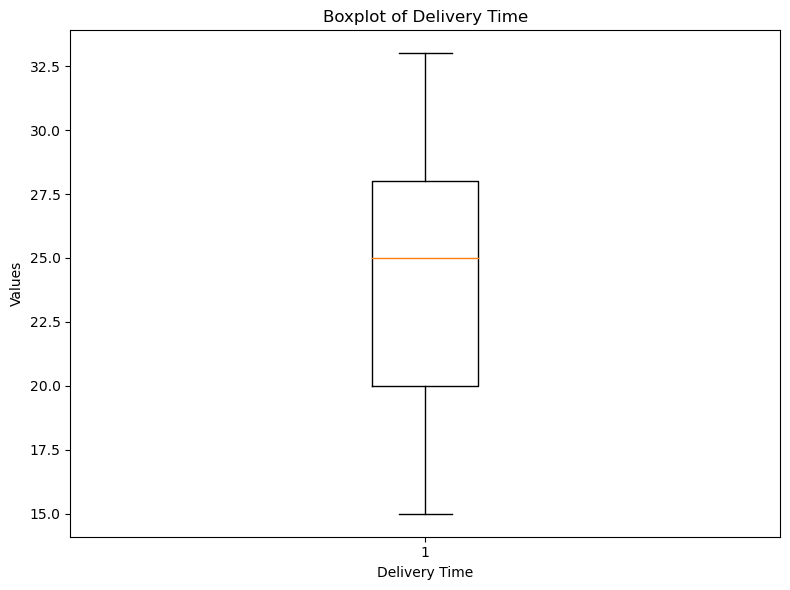

In [17]:
# boxplots of numerical values
col_box = ['Cost of the Order', 'Food Preparation Time', 'Delivery Time']

for col in col_box: 
    plt.figure(figsize=(8,6))
    plt.boxplot(food[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.tight_layout()
    plt.show()

**Boxplots were created for Cost of the Order, Food Preparation Time, and Delivery Time to observe if there are any outliers and see their distributions. None of the boxplots show any outliers, so there is not any outlier handling needed. For Cost of the Order the center line is closer to the first quartile of the box plot which indicates that the distribution is negatively skewed, and the data is concentrated towards the higher values. The box plot for Food Preparation Times shows that it has a fairly normal skew, and the last box plot Delivery Time has a positive skew since the middle line is closer tp the third quartile and the data is concentrated towards the lower values.**

### Average Ratings for Each Restaraunt

In [12]:
# average rating for each restaraunt

average_ratings = food.groupby('Restaurant Name')['Rating'].mean().reset_index()

average_ratings.sort_values(by='Rating', ascending=False).head(50)

,Restaurant Name,Rating
0,'wichcraft,5.000000
120,Ravagh Persian Grill,5.000000
37,Chola Eclectic Indian Cuisine,5.000000
38,Chote Nawab,5.000000
82,Junoon,5.000000
137,Socarrat Paella Bar,5.000000
43,DespaÌ±a,5.000000
45,Dig Inn Seasonal Market,5.000000
133,Saravanaa Bhavan,5.000000
49,Donburi-ya,5.000000


In [19]:
# define rating ranges
rating_ranges = [(5, 4), (4, 3), (3, 2), (2, 1), (1, 0)]

# store counts for each range
rating_counts = {f'{high}-{low} stars': 0 for high, low in rating_ranges}

# count number of restaurants falling into each range
for high, low in rating_ranges:
    count = len(average_ratings[(average_ratings['Rating'] <= high) & (average_ratings['Rating'] > low)])
    rating_counts[f'{high}-{low} stars'] = count

# print counts
for rating_range, count in rating_counts.items():
    print(f'Restaurants with an average of {rating_range}: {count}')

Restaurants with an average of 5-4 stars: 110
Restaurants with an average of 4-3 stars: 38
Restaurants with an average of 3-2 stars: 8
Restaurants with an average of 2-1 stars: 0
Restaurants with an average of 1-0 stars: 0


**The average ratings for each restaraunt were calcualted, and the first 50 restaraunts were printed out. To gain a better understanding of these ratings the restaraunts are categorized into different rating ranges. The results show that 110 restraunts had a rating range from 5-4, 38 restraunts had a range of 3-4,8 restaraunts had a rating range of 2-3, and there were 0 restraunts from 0-2 stars.**

### Correlation Heatmap

                       Cost of the Order  Food Preparation Time  \
Cost of the Order               1.000000               0.041527   
Food Preparation Time           0.041527               1.000000   
Delivery Time                  -0.029949               0.011094   
Rating                          0.033983              -0.006083   

                       Delivery Time    Rating  
Cost of the Order          -0.029949  0.033983  
Food Preparation Time       0.011094 -0.006083  
Delivery Time               1.000000 -0.009804  
Rating                     -0.009804  1.000000  


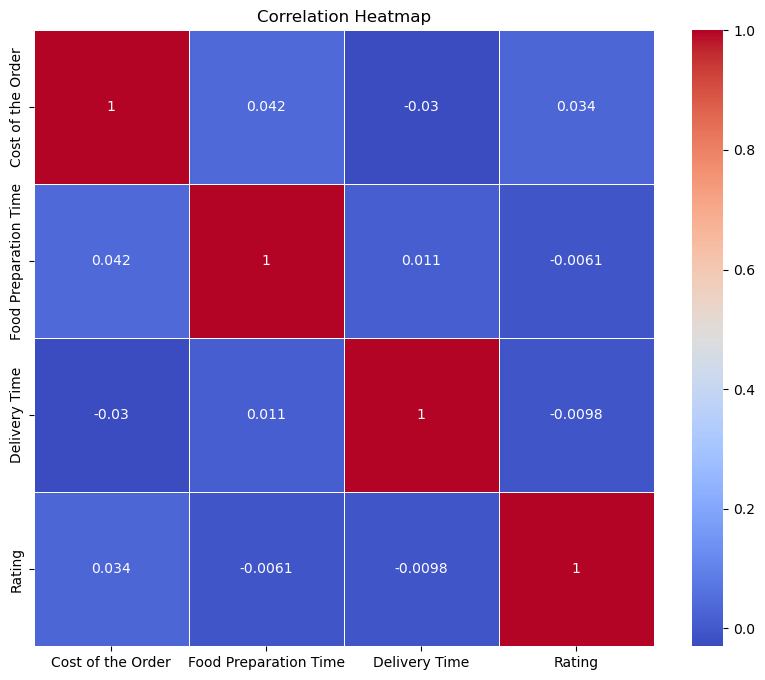

In [20]:
# correlation 
numerical_cols = ['Cost of the Order', 'Food Preparation Time', 'Delivery Time', 'Rating']

# calculate the correlation matrix
corr_matrix = food[numerical_cols].corr()

print(corr_matrix)

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**A correlation heatmap was created with the Ratings, Cost of the Order, Food Preparation Time, and Delivery Time. These correlations all show that there is weak association between one another.**

### Relationship between Rating, Delivery Time, and Food Prep Time with Cost of Order

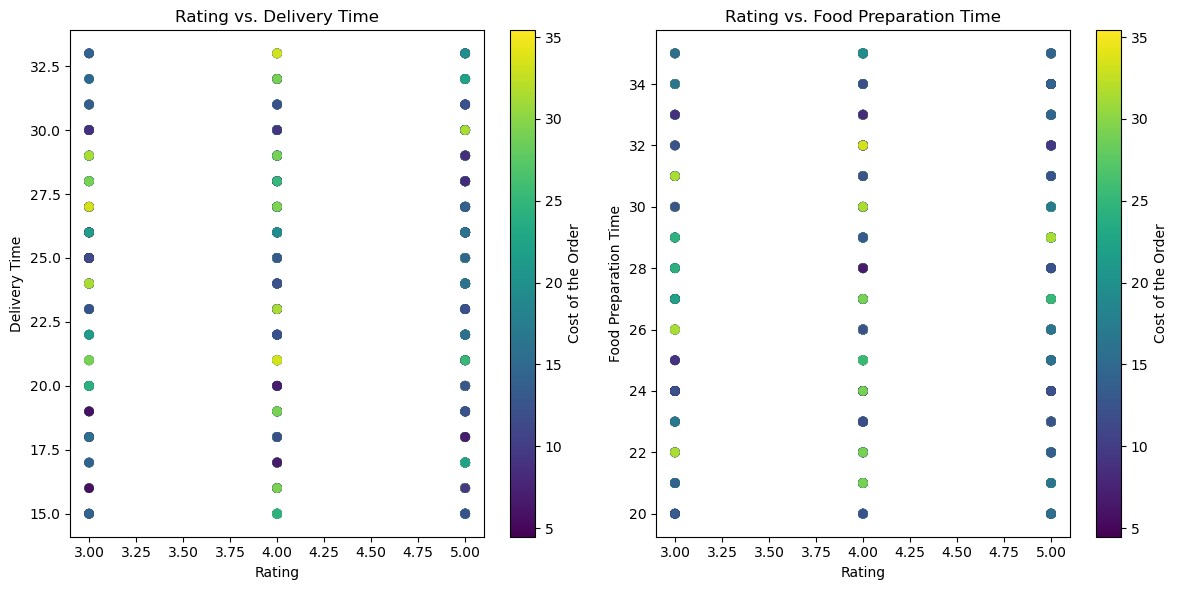

In [15]:
plt.figure(figsize=(12, 6))

# Scatter plot for Rating vs. Delivery Time
plt.subplot(1, 2, 1)
plt.scatter(food['Rating'], food['Delivery Time'], c=food['Cost of the Order'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.title('Rating vs. Delivery Time')
plt.colorbar(label='Cost of the Order')

# Scatter plot for Rating vs. Food Preparation Time
plt.subplot(1, 2, 2)
plt.scatter(food['Rating'], food['Food Preparation Time'], c=food['Cost of the Order'], cmap='viridis')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.title('Rating vs. Food Preparation Time')
plt.colorbar(label='Cost of the Order')

plt.tight_layout()
plt.show()

**A scatter plot between Rating vs. Delivery Time and Rating vs. Foor Preparation Time with Cost of Order was created. Looking at the ratings we see that the delivery time as well as the food preparation time are ranged from high to low times no matter the rating. Upon further inspection for each scatter plot we see that the five star ratings have lower cost of food.**

## Data Splitting

In [23]:
# defining features(X) and target (y) variables
X = food[['Cost of the Order', 'Food Preparation Time', 'Delivery Time']]
y = food['Rating']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# calculate proportions
total_samples = len(X)
train_samples = len(X_train)
test_samples = len(X_test)

train_proportion = round((train_samples / total_samples) * 100)
test_proportion = round((test_samples / total_samples) * 100)

# print proportions
print(f"Training Proportion: {train_proportion}%")
print(f"Test Proportion: {test_proportion}%")

Training Proportion: 70%
Test Proportion: 30%


**The data is split into a training and test data set. The test data set makes up 30% of the data while the training data set is 70% of the data set. The split data is then checked to ensure that the splitting was done correctly.**